<h1 align="center"> Credit Card Fraud Detection </h1>

<h2 align="center"> Bruno Ortega Goes</h2>

This data set was doanloaded from kaggle learn.

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the **class imbalance** ratio, we recommend measuring the **accuracy using the Area Under the Precision-Recall Curve (AUPRC)**. Confusion matrix accuracy is not meaningful for **unbalanced classification**.

### Commercial importance
 * If a fraud happens it is of interest for both the bank and the client that the card is blocked.
 * We want a model that minimizes as much as possible the confusion, so that neither the client nor the bank looses money by misclassification.

# 0. Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# Set the font scale
sns.set(font_scale=1.5) # I'm a bit blind, so I like big font sizes


# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
# path to save my plots:
plots_path = '/Users/brunogoes/Dropbox/GitHub/DataLabStudy/Project0/Figures/'

def save_plot(name_extension):
    plt.savefig(plots_path+name_extension, bbox_inches = 'tight')

# Some styling for the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['text.usetex'] = True
# To index plots smartly and automatically
import string
alphabet = list(string.ascii_lowercase)
font_Size = fsize = 22 #default font size for my plots

# 1.Exploratory analysis

**The goal is to classify if a transaction is a fraud (1) or not (0). The challenge is that the data set is highly unbalenced. The frauds are less than 1% of the data set. This means that the data requires treatement before modelling so that the model really learns when a transaction is fraud or not, otherwise it is just going to classify it as not fraudelent and it will be accurate more than 99% of times.**

In [3]:
df = pd.read_csv('/Users/brunogoes/Dropbox/DataSets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# What's the shape?
df.shape

(284807, 31)

* We have 284k data with 31 features.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Legitime transactions corresponds to', round(df['Class'].value_counts(normalize=True)[0]*100,3),'% of the data set.  While the frauds correspond to', round(df['Class'].value_counts(normalize=True)[1]*100,3),'% of the data set.')




Legitime transactions corresponds to 99.827 % of the data set.  While the frauds correspond to 0.173 % of the data set.


* The mean amount value of the transactions is about 88.34 €. Let's approximate it by 100€. This will permit us to estabilish a metric for the performance based on the mean amount that the client/bank will not loose.

Let's get some information about the variables:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.Class.unique()

array([0, 1])

The class is composed only of 0 and 1.

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

We only have 492 frauds. 

**First idea to deal with the inbalance:** Let's balance it! I mean I can create a more balanced data frame. 

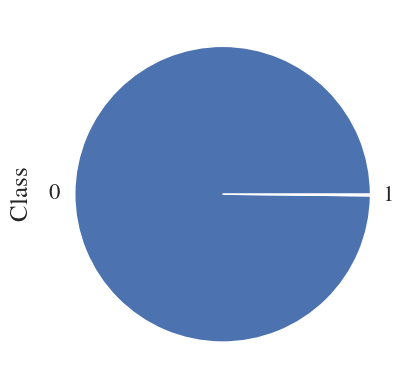

In [10]:
# Pie chart
(df['Class'].value_counts(normalize=True)*100).plot.pie()
save_plot('PiePlotBruteData.pdf')

In [11]:
# What are the columns?
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

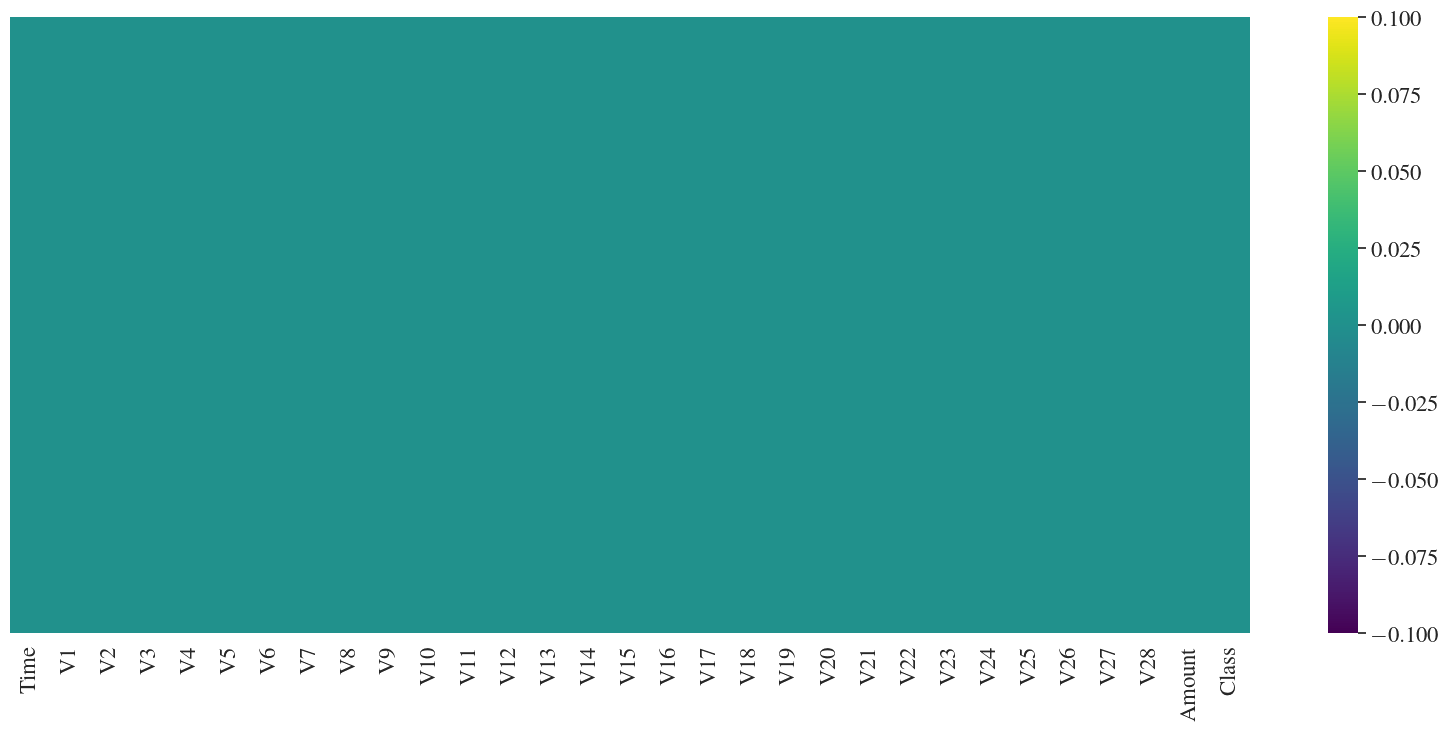

In [12]:
plt.figure(figsize = (20,8))
sns.heatmap(df.isnull(), cbar = True, yticklabels = False, cmap = 'viridis')

plt.savefig(plots_path+'missingValueFraudDetection.jpg', bbox_inches = 'tight')
plt.show()

* This is a nice data set. There are no missing values to treat.

Yet another way of checking it:

In [13]:
np.sum(df.isnull()).T

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 1.1 Geting intuition about the important variables

#### 1.1.1 Distributions of time and amounts

* What are the distributions of values of the transactions? and times?

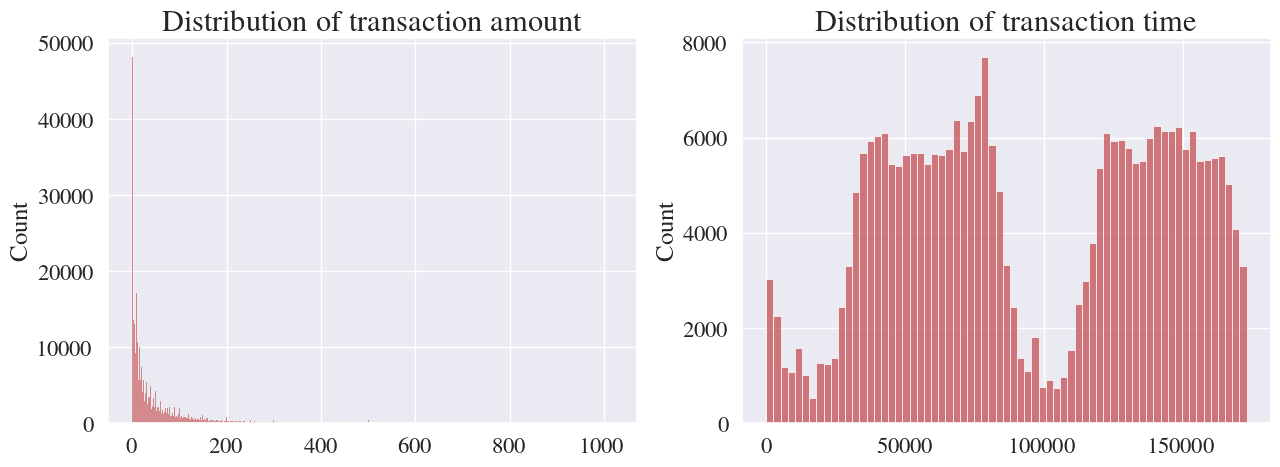

In [14]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val[amount_val < np.percentile(amount_val,99)], ax = ax[0], color = 'r')
ax[0].set_title('Distribution of transaction amount', fontsize = fsize)
#ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax = ax[1], color = 'r')
ax[1].set_title('Distribution of transaction time', fontsize = fsize)

plt.savefig(plots_path+'TransactionAndTimeDistributionsOriginal.pdf', bbox_inches = 'tight')
plt.show()

**Take away messages**
* This tells us that most of the transactions are low values.

* Also we observe a wave-ish behavior of the trasactions. The data set represents 2 days of transaction, hence during the night, the valleys, there are not so many transactions while during the day, the peaks, they are frequent. 

* **At this point we make an important observation: Amount and time are features that must be rescaled before using learning algorithms. For instance, if I use some tree based algorithm, any transaction that happens after 175000 units of time the model will not be trainned to deal with such a value and will not work.**
    * To deal make this treatment I'll use the robust scaler from scikit-learn (https://nikhilthapa12.medium.com/credit-card-fraud-detection-in-depth-study-data-preparation-ecd74da3a1c7)

#### Correlation matrix

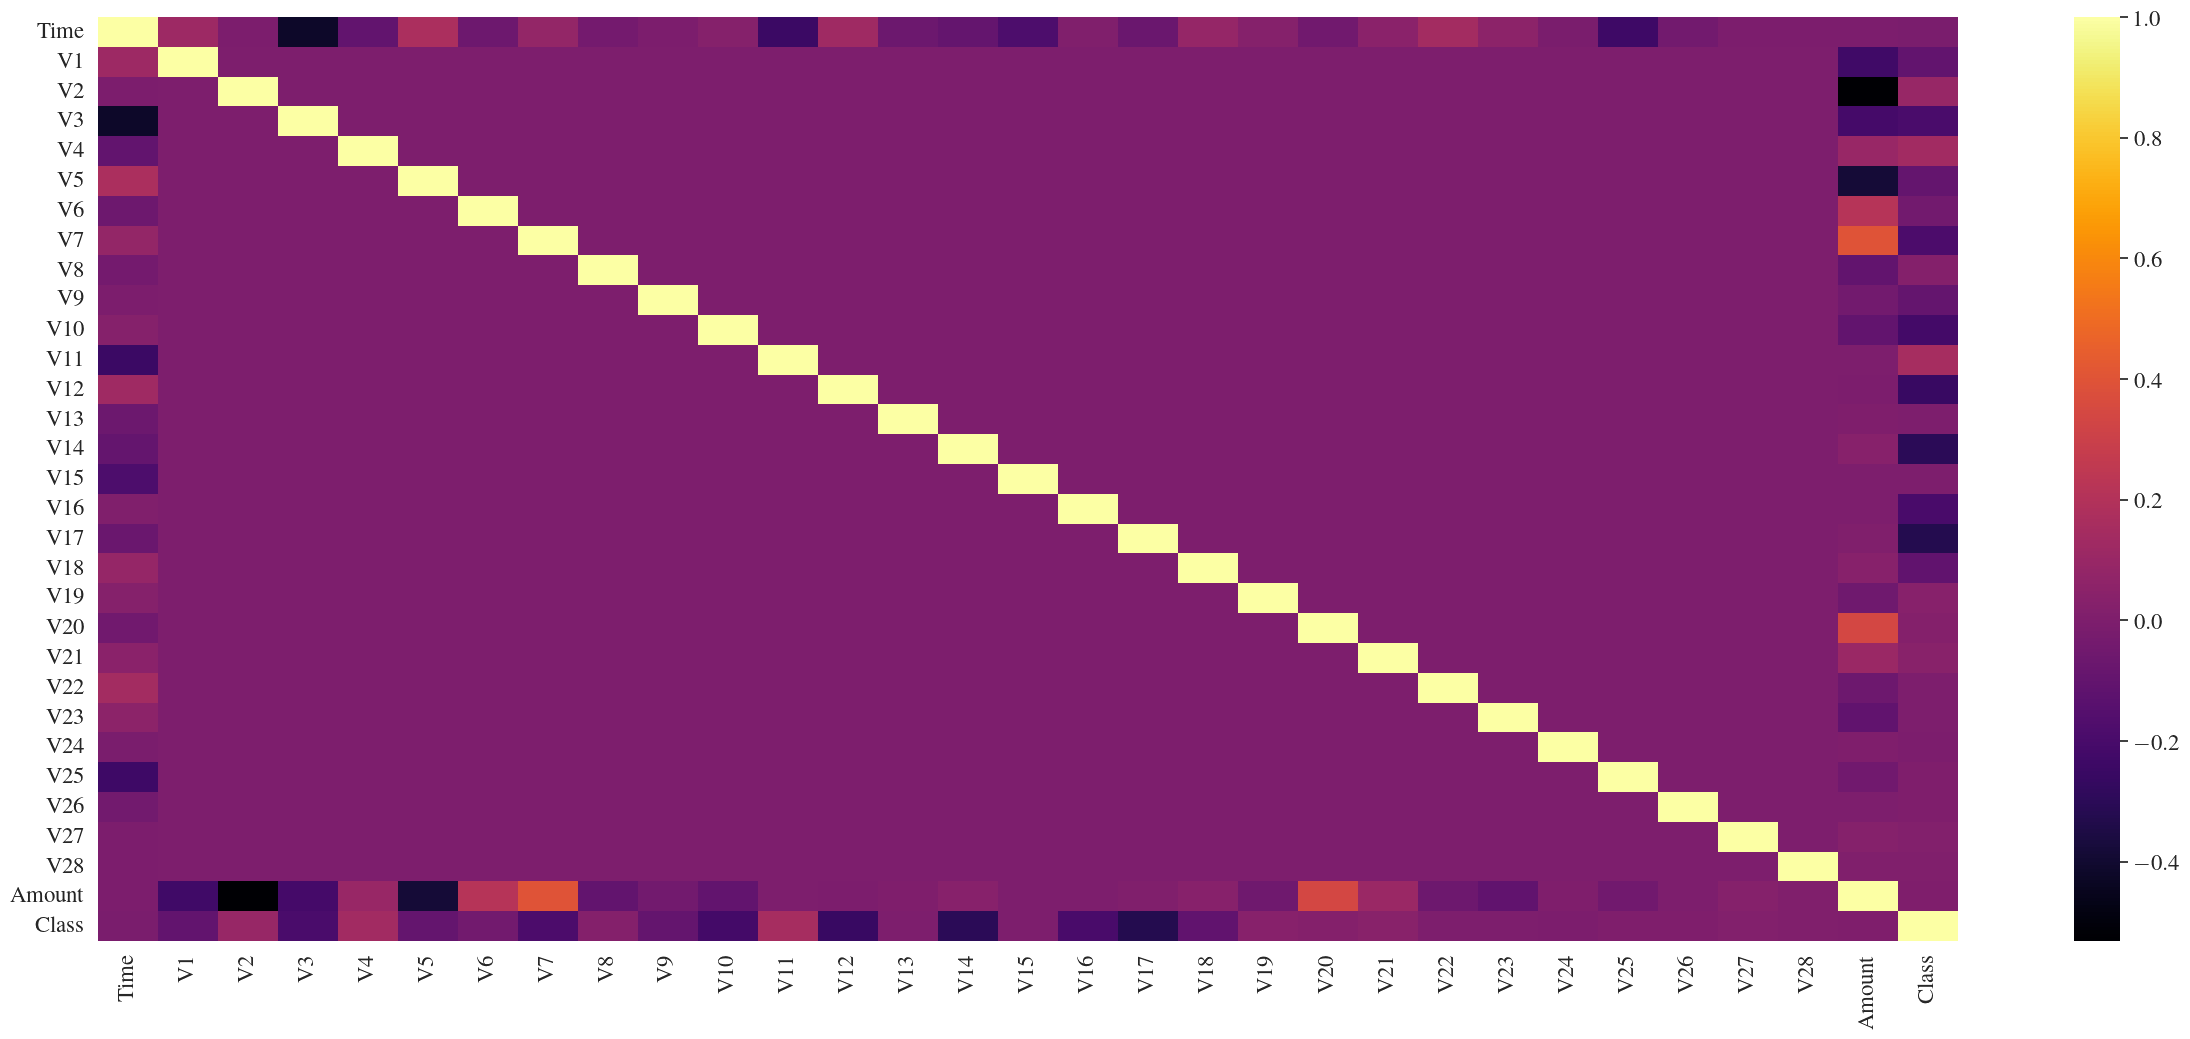

In [15]:
plt.figure(figsize = (30,12))
sns.heatmap(df.corr(), cmap = 'inferno', annot = False)

plt.savefig(plots_path+'FullDSCorrelationMatrix.jpg', bbox_inches = 'tight')
plt.show()

* It seems that V11 is the most correlated with the Class in the full data set. Is that true for the smaller data sets?

* Obs.: This is the correlation matrix for the original data set, appart for V's features the time and amount have not been preprocessed.

* Most of the features are not correlated. It is a hallmark of the PCA transformation, a dimensionality reduction technique.

# 2. Preprocessing: setting up the work

## 2.1 Rescaling time and amount distributions



It is  possible to use the timedelta function of pandas to write the time in seconds, minutes and hours. It might be an interesting route for the model construction: 
* Is there a particular time where the frauds happen? If I were to commit a credit fraud card I'd do it by the night, so that everybody is not checking their phones for transactions notifications...

In [16]:
delta_Time = pd.to_timedelta(df['Time'], unit = 's') # Take the time column and write it in seconds

# From this we can create 3 different columns
df['Time_Day'] = (delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (delta_Time.dt.components.minutes).astype(int) 

In [17]:
df['Time_Hour']

0          0
1          0
2          0
3          0
4          0
          ..
284802    23
284803    23
284804    23
284805    23
284806    23
Name: Time_Hour, Length: 284807, dtype: int64

In [18]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

* I do not care about the day or the minute the transactions take place. I'll keep instead the column of hour. This is relevant to train my models.
* To rescale the amount I use the robust scaler, because it is less affected by (possible) outliers

In [19]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

#df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Getting rid of the original time and amounts columns and substitute with the scaled ones.
df.drop(['Time', 'Amount'], axis = 1, inplace = True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,Time_Day,Time_Hour,Time_Min,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,0,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,0,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,0,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,0,0,0.670579


* The features amount and time were rescaled, the latter lies in an interval -1,1.

* Below the same distribution plots with the new rescaled parameters

In [20]:
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace = True)

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hour,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0,0.670579


In [22]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hour,scaled_amount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,23,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,23,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,23,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,23,-0.167680
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0,23,2.724796


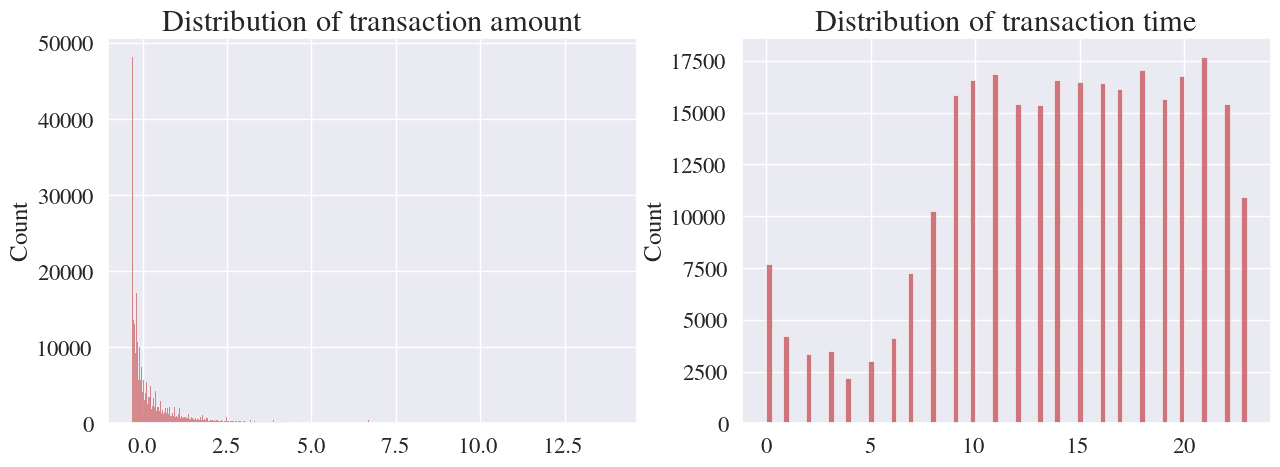

In [23]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

amount_val = df['scaled_amount'].values# Para regressao logistica ajuda, mas nao necessario. 
time_val = df['Time_Hour'].values

sns.histplot(amount_val[amount_val < np.percentile(amount_val,99)], ax = ax[0], color = 'r')
ax[0].set_title('Distribution of transaction amount', fontsize = fsize)
#ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax = ax[1], color = 'r')
ax[1].set_title('Distribution of transaction time', fontsize = fsize)

plt.savefig(plots_path+'TransactionAndTimeDistributions.pdf', bbox_inches = 'tight')
plt.show()

The problem is clear: I have to learn how to deal with an imbalanced data set. And I already had an idea that is to balance it somehow. 

I googled about it and I found the following articles:
* https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18 : This one gives a good step-by-step way of dealing with the problem. But it uses precisely the dataset I'm analysing, so it feels like cheating, I won't use it as a base.
* https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html : This one talks about 7 techniques, and I learned that my idea has a name it is called **Resemplaing the dataset**. And there are two ways of doing it.

## 2.2 Splitting the original data set in a training set, a dev set, and a test set 

In [28]:
from sklearn.model_selection import train_test_split

# Separating input features and target
# My target variable is the class
y = df.Class

# My features are everything else, so I take out the 'Class' column. 
X = df.drop('Class', axis = 1)

# Defining the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# Defining the training and dev sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.4, random_state=42, stratify=y_train)

* Stratify is used to make sure that both y_train and y_test have the same statistics, assuring they are both good representations of the whole dataset, an important feature when dealing with imbalaced problems.

In [29]:
y_test.mean()

0.0017292381696408978

In [30]:
y_train.mean()

0.001726324002730908

In [31]:
y_dev.mean()

0.0017263071656377096

Let's look at the histogram of legitimate transactions and frauds.

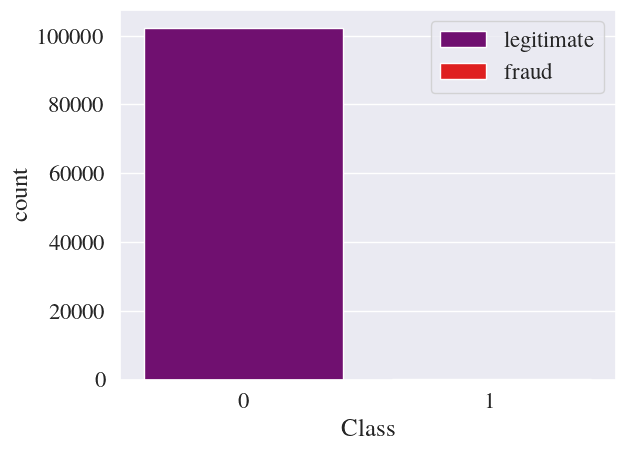

In [32]:
sns.countplot(x=y_train, data=X_train, palette=["purple", "red"], label=["legitimate", "fraud"])
plt.legend(['legitimate', 'fraud'])

plt.savefig(plots_path+'ClassesHistogramOrginalSet.pdf', bbox_inches = 'tight')
plt.show()

* Next, we plot the distributions of each feauture

In [33]:
X.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Time_Hour', 'scaled_amount'], dtype=object)

In [34]:
# Getting a string of all the column names
cols = list(X.columns.values)

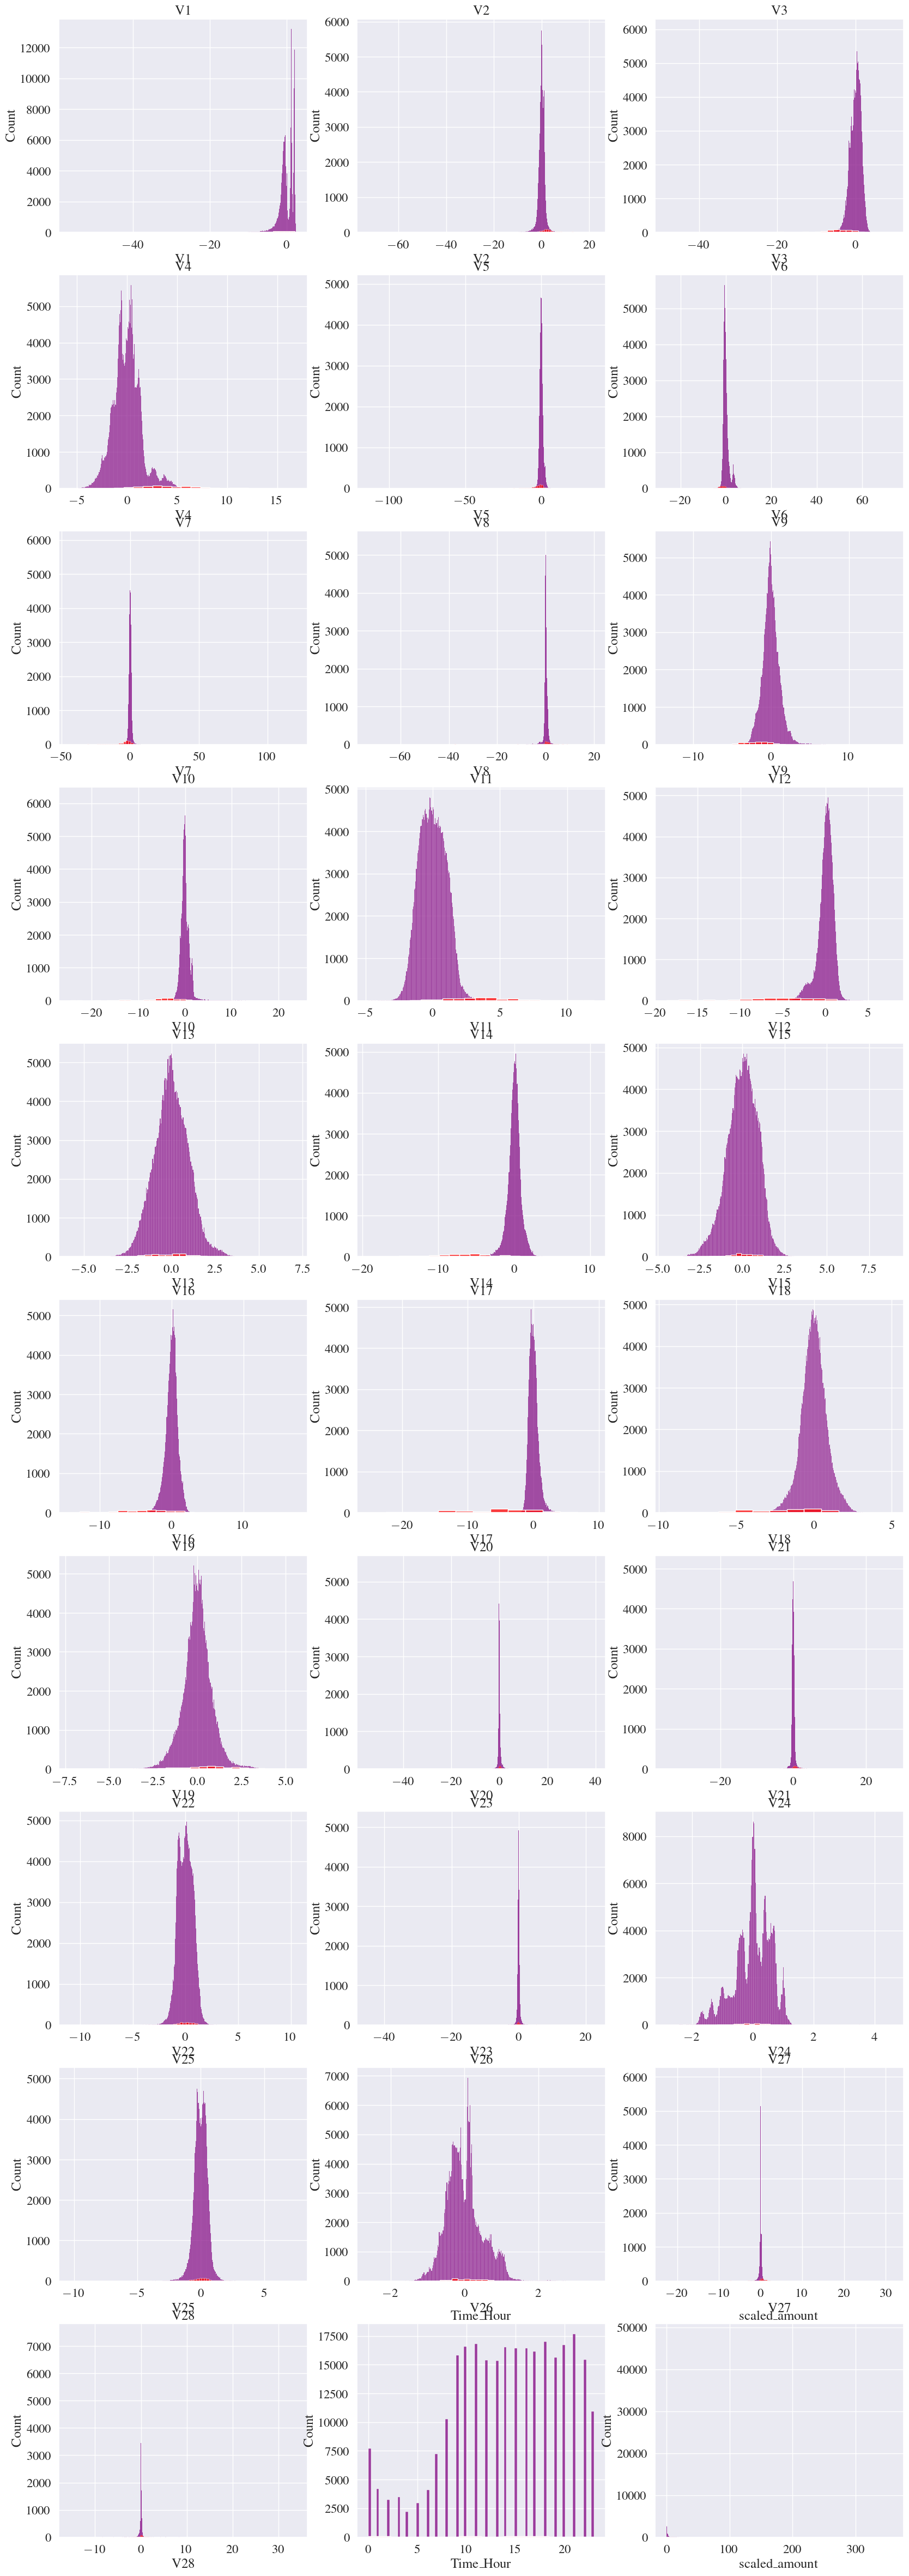

In [38]:
# plot the histogram for each feature of the dataset to see the skewness
legitimate_records = df.Class == 0
fraud_records = df.Class == 1

# Set the number of rows and columns for the subplots
num_rows = 10
num_cols = 3

# Create a new list containing the first 30 columns (or less if there are fewer columns)
cols_to_plot = cols[:num_rows*num_cols]

# Create subplots
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols_to_plot):
    plt.subplot(num_rows, num_cols, n + 1)
    sns.histplot(X[col][legitimate_records], color='purple')
    sns.histplot(X[col][fraud_records], color='red')
    plt.title(col)

plt.show()




* This gives us a hint about the skewness of the dataset.

In [35]:
# Describe the scaled_amount statistics of the legitimate Class
df[df.Class == 0].scaled_amount.describe()

count    284315.000000
mean          0.926305
std           3.494796
min          -0.307413
25%          -0.228464
50%           0.000000
75%           0.769231
max         358.683155
Name: scaled_amount, dtype: float64

In [36]:
# Describe the scaled_amount statistics of the fraud Class
df[df.Class == 1].scaled_amount.describe()

count    492.000000
mean       1.400284
std        3.586715
min       -0.307413
25%       -0.293440
50%       -0.178160
75%        1.172221
max       29.398030
Name: scaled_amount, dtype: float64

In [37]:
df[df.Class == 1].Time_Hour.describe()

count    492.000000
mean      11.646341
std        6.663342
min        0.000000
25%        5.000000
50%       12.000000
75%       17.000000
max       23.000000
Name: Time_Hour, dtype: float64

* The mean hour that the frauds occur is around 11, and not in during the night as I imagined.

In [38]:
# Comparing the mean values of the features for each class
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_Hour,scaled_amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,14.050623,0.926305
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,11.646341,1.400284


* The mean values are very different. This is already an important remark for the learning algorithm.

# 3.Baseline models on brute data

About the Base line models:
* **DummyClassifier** makes predictions that ignore the input features. This classifier serves as a simple baseline to compare against other more complex classifiers.
* **Logistic regression** is the most basic classification algorithm.

The idea is that the simplest models give us the **base value of the metrics** to improve. The dummyclassifier is basically based on a frequentist approach to probability. 

* At this point the only treatment I did was to scale the amount and value. Hence, once the data is properly balanced in the next sections the performance must be better.

In [25]:
# Baseline models:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, precision_score, auc, roc_auc_score, log_loss
from sklearn.metrics import precision_recall_curve



## 3.0 Dummy classifier: This is actually really not useful

In [39]:
# Learn with the training set
dummy = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)

# Use your knowledge to predict on the test set
dummy_pred = dummy.predict(X_test)

In [40]:
print('Unique predicted labels:', np.unique(dummy_pred))

Unique predicted labels: [0]


In [41]:
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    113923
Name: 0, dtype: int64

In [43]:
# What is the accuracy of this super simple model?
print('Accuracy of DummyClassifier:', accuracy_score(y_test, dummy_pred))
print('Precision of DummyClassifier:', precision_score(y_test, dummy_pred))
print('Recall of DummyClassifier:', recall_score(y_test, dummy_pred))
print('f1 score of DummyClassifier:', f1_score(y_test, dummy_pred))
print('ROC-AUC of DummyClassifier:', roc_auc_score(y_test, dummy_pred))
pd.DataFrame(confusion_matrix(y_test,dummy_pred))





Accuracy of DummyClassifier: 0.9982707618303591
Precision of DummyClassifier: 0.0
Recall of DummyClassifier: 0.0
f1 score of DummyClassifier: 0.0
ROC-AUC of DummyClassifier: 0.5


/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,113726,0
1,197,0


* This is super accurate. While the other metrics are giving hoorrible results, as expectred. Accuracy in this imbalanced dataset is not a good metric. For this reason I'll be dropping the Accuracy for the next analysis.

* The former line tells us that the Dummy classifier is saying that transaction is a fraud. It is just guessing everything is a valid transaction, and even with this lazy answer it is getting the answer right in the test set 99.84% of the times!

* Matrics to be explored: f1 score, Recall, ROC-AUC (my favorite) and confusion matrix.

* The f1-score and the recall are threshold dependent matrics, this is something to be aware of.


## 3.1 Logistic regression: Brute data, no balancing

In [55]:
# Training logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_dev = LogisticRegression(solver='liblinear').fit(X_dev, y_dev)

# Applying to the dev set to study the thrshold
lr_brutedata_predprob_dev = lr_dev.predict_proba(X_test)

lr_brutedata_predprob = lr.predict_proba(X_test)


# Logistic regression prediction
# Never use prediction, when I work with threshold dependent metrics it can lead to bad/good scores.
#lr_prediction = lr.predict(X_test)
# "Nunca use o predict", Carlo
#lr_prediction = lr_predictionproba[:,1]

# This way I can control the thr
#thr = 0.5
#lr_prediction = ((lr_predictionproba[:,1] > thr).astype(int))

* The predict_proba gives the probability of each of the classes. If this probability is higher then a given thrshold then we tag the prediction by that class.
* **It is the prediction_proba that we have to use to compute the ROC-AUC**

We have:

In [57]:
# There is a threshold probability, the predict does the following under the carpet(0.5 is the threshold).
((lr_brutedata_predprob_dev[:,1] > 0.5).astype(int) == lr_dev.predict(X_test)).all()

True

**When we use threshold dependent metrics it is important to use predict_proba instead of predict. This allows us to have control over the threshold.**

https://vitaliset.github.io/threshold-dependent-opt/

https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

### 3.1.1 Studying the threshold dependency for f1-score and recall

* I want to check how the precision, recall and f1_score depend on the thrshold:

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


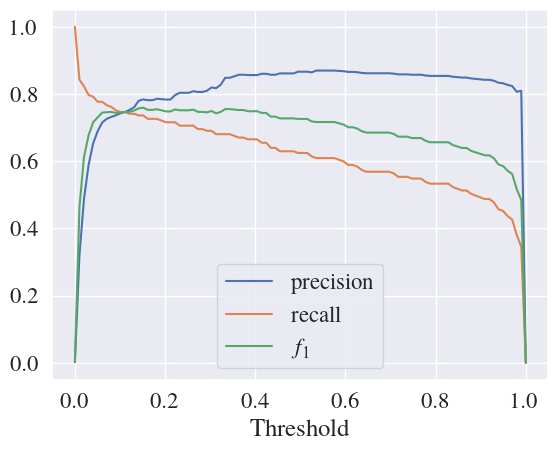

In [58]:
lista_thr = np.linspace(0,1,100)
lista_precision = []
lista_recall = []
lista_f1 =[]


for thr in lista_thr:
    
    precision_thr = precision_score(y_test, (lr_brutedata_predprob_dev[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lr_brutedata_predprob_dev[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lr_brutedata_predprob_dev[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label='f1')
plt.xlabel('Threshold')
plt.legend(['precision','recall',r'$f_1$'])

save_plot('LogisticRegression-Thrverification-NoBalancing.pdf')
plt.show()

* From the plot above we infer that a good thr is about 0.15.
* Based on this information I define the following predictions, then I'll test the metrics with then:

In [59]:
lr_prediction_std = ((lr_brutedata_predprob[:,1] > 0.5).astype(int))
lr_prediction = ((lr_brutedata_predprob[:,1] > 0.15).astype(int))

### 3.1.2 Checking classification metrics

**I will study the performance of my model by means of 4 classification metrics:**

1. Precision = TP/(TP+FP) = proportion of predicted trur positives that are really a positive
2. Recall = TP/(TP+FN) = proportion of true positives that were correctly classified
3. $f_1$ score that is an harmonic mean between the precision and recall.
4. How accurately are we classifying the points? Or how mixed they are? This answer is provided by the ROC-AUC. The ROCAUC is a good metric because we know that the model is tossing a coin if its value is 0.5 and it is actually inverting the classes if the points are below the 0.5 line. Also, it is a threshehold independent score.ROC-AUC: that informs how many of our data points were correctly classified. It is 0.5 if the model is randomly classifying, <0.5 if it actually is classifying on contrary and >0.5 if it is classifying correctly, the closer to 1 the better.

I dropped completly the accuracy as it is a high value even for a dummy classifier on the brute data set. 1-3 are threshold dependent, so I'll make an analysis of the threshold andprefer to use predic_prob instead of predict.

In [103]:
def metric_printer(y_prediction_proba, thr = 0.5):
    
    pred = (y_prediction_proba[:,1] > thr).astype(int)
    
    cf = pd.DataFrame(confusion_matrix(y_test,pred))
    
    print('Precision:', round(precision_score(y_test, pred),2))
    print('Recall:', round(recall_score(y_test, pred),2))
    print('f1 score:', round(f1_score(y_test, pred),2))
    print('ROC-AUC:', round(roc_auc_score(y_test, y_prediction_proba[:,1]),2))
    print('Confunsion matrix:')
    print(cf)
    #print(np.sum(cf[1]))
    #print(cf[0][1]*100 "€ were misclassified as legitimate but were fraud")
    
    
    return None

In [104]:
metric_printer(lr_brutedata_predprob) #thr = 0.5

Precision: 0.79
Recall: 0.65
f1 score: 0.72
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113692   34
1      68  129


In [284]:
metric_printer(lr_brutedata_predprob, 0.16) 

Precision: 0.77
Recall: 0.74
f1 score: 0.75
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113682   44
1      51  146


* We observe that all the metrics, except for the precision, had a significant improvement by simply fine tuning the threshold.

* The confusion matrix informs that there were less true positives but also more false negatives. This was captured by the f1 score.

## 3.4.Random forest: Brute data, no balancing

The Random Forest is a powerful learning algorithm. I expect that, even before doing the samplings the matrics are going to be considerably improved.

In [119]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Training the model: taking care to not overfit the model I put some n_stimators and a max_depth. n_jobs = -1 puts all the cores of my computer to work.
rf_brutedata = RandomForestClassifier(n_estimators = 500, max_depth = 20, n_jobs=-1).fit(X_train, y_train)
# by changing the n_estimators and the max_depth I actually can make it better.

CPU times: user 8min 59s, sys: 2.16 s, total: 9min 1s
Wall time: 35.3 s


In [120]:
%%time
rf_brutedata_dev = RandomForestClassifier(n_estimators = 500, max_depth = 20, n_jobs=-1).fit(X_dev, y_dev)



CPU times: user 4min 22s, sys: 1.27 s, total: 4min 23s
Wall time: 17.3 s


In [122]:
# Making predictions
rf_brutedata_predprob = rf_brutedata.predict_proba(X_test)

rf_brutedata_predprob_dev = rf_brutedata_dev.predict_proba(X_test)

#rf_predictionproba_dev = rf_dev.predict_proba(X_test)

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


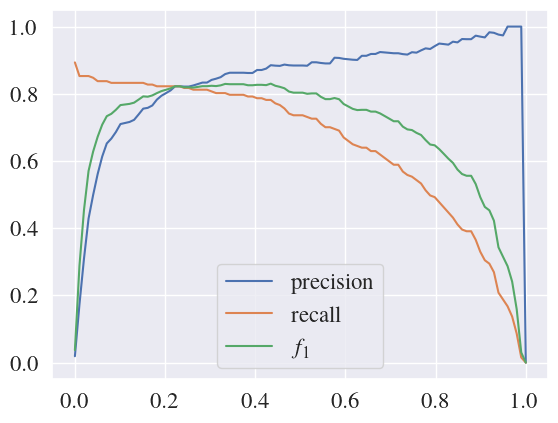

In [143]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    precision_thr = precision_score(y_test, (rf_brutedata_predprob_dev[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (rf_brutedata_predprob_dev[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (rf_brutedata_predprob_dev[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('RandomForest-Thrverification-NoBalancing.pdf')
plt.show()

* In the case of the RF we can infer that the good thr is about 0.25.

In [150]:
metric_printer(rf_brutedata_predprob, 0.45) 

Precision: 0.92
Recall: 0.8
f1 score: 0.85
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113712   14
1      40  157


In [151]:
metric_printer(rf_brutedata_predprob)

Precision: 0.93
Recall: 0.78
f1 score: 0.85
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113714   12
1      43  154


* The RF performs better in all the metrics even without proper adjustment of the thrshold. Further treatment is required.

In [146]:
jlist = np.arange(10,710,100)
ROCAUClist = []

for j in jlist:
    print(j)

    arvore = RandomForestClassifier(n_estimators = j,random_state=0, n_jobs = -1) 

    arvore.fit(X_train, y_train)

    prediction = arvore.predict(X_test)

    ROCAUClist.append(np.sqrt(roc_auc_score(y_test, prediction)))

10
110
210
310
410
510
610


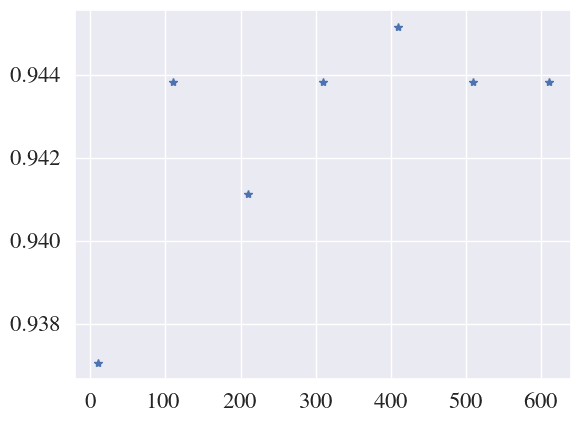

In [147]:
plt.plot(jlist, ROCAUClist, "*")

# Using class_weight

In [156]:
# Training logistic regression
lr_bal = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_train, y_train)
lr_dev_bal = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_dev, y_dev)

# Applying to the dev set to study the thrshold
lr_brutedata_predprob_dev_bal = lr_dev_bal.predict_proba(X_test)

lr_brutedata_predprob_bal = lr_bal.predict_proba(X_test)

In [169]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Training the model: taking care to not overfit the model I put some n_stimators and a max_depth. n_jobs = -1 puts all the cores of my computer to work.
rf_brutedata_bal = RandomForestClassifier(n_estimators = 500, max_depth = 20, class_weight='balanced', n_jobs=-1).fit(X_train, y_train)
# by changing the n_estimators and the max_depth I actually can make it better.
rf_brutedata_bal_dev = RandomForestClassifier(n_estimators = 500, max_depth = 20, class_weight='balanced', n_jobs=-1).fit(X_dev, y_dev)

# Making predictions
rf_brutedata_predprob_bal = rf_brutedata_bal.predict_proba(X_test)

rf_brutedata_predprob_dev_bal = rf_brutedata_bal_dev.predict_proba(X_test)

CPU times: user 6min 59s, sys: 3.13 s, total: 7min 2s
Wall time: 28.5 s


/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


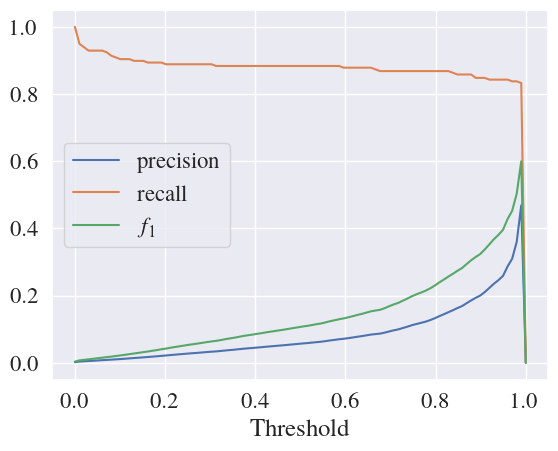

In [168]:
lista_thr = np.linspace(0,1,100)
lista_precision = []
lista_recall = []
lista_f1 =[]


for thr in lista_thr:
    
    precision_thr = precision_score(y_test, (lr_brutedata_predprob_dev_bal[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lr_brutedata_predprob_dev_bal[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lr_brutedata_predprob_dev_bal[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label='f1')
plt.xlabel('Threshold')
plt.legend(['precision','recall',r'$f_1$'])

save_plot('LogisticRegression-Thrverification-Balanced.pdf')
plt.show()

* I do not know how to interpret the plot above.
* For the brute dataset with balancing of the classes I'll drop the Logistic regression as it is very imprecise and do not provide a good F1.

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


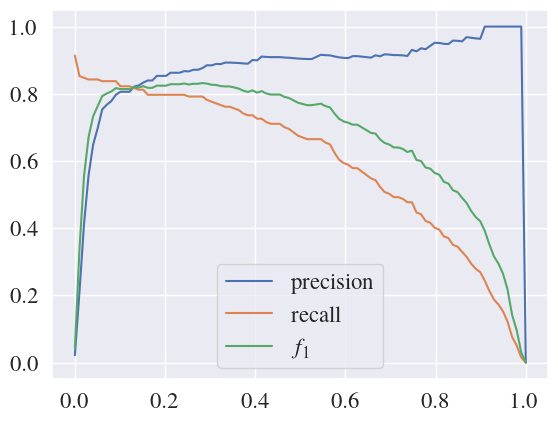

In [170]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    precision_thr = precision_score(y_test, (rf_brutedata_predprob_dev_bal[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (rf_brutedata_predprob_dev_bal[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (rf_brutedata_predprob_dev_bal[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('RandomForest-Thrverification-Balanced.pdf')
plt.show()

In [164]:
print('Not balanced')
metric_printer(rf_brutedata_predprob)
print('Balanced')
metric_printer(rf_brutedata_predprob_bal)

Not balanced
Precision: 0.93
Recall: 0.78
f1 score: 0.85
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113714   12
1      43  154
Balanced
Precision: 0.94
Recall: 0.77
f1 score: 0.85
ROC-AUC: 0.97
Confunsion matrix:
        0    1
0  113716   10
1      45  152


In [189]:
print('Not balanced')
metric_printer(rf_brutedata_predprob,0.45)
print('Balanced')
metric_printer(rf_brutedata_predprob_bal, 0.35)

Not balanced
Precision: 0.92
Recall: 0.8
f1 score: 0.85
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113712   14
1      40  157
Balanced
Precision: 0.91
Recall: 0.76
f1 score: 0.83
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113712   14
1      47  150


* The Random forest with balancing with a standard threshold performs in better overall.

#  4. Data processing: Resampling

Next step is to systematially implement my first idea, i.e., work with resampling. There are 3 ways of doing it that I will explore here:

1.Oversample minority class

2.Undersample majority class

3.Generate synthetic samples: SMOTE

I'll train 2 models and check the performance of the metrics with them. The models I choose are:
1. Logistic regression
2. Random forest

## 4.1 Oversample minority class

* This first strategy we keep all the legitimate transactions but we will add more copies of the frauds, to increase the proportion between the classes.

* Skikit learn is able to randomly replicate the samples.

In [215]:
from sklearn.utils import resample

# We start by glueing the training data together
X = pd.concat([X_train,y_train], axis = 1)

In [216]:
# Separating the classes:
fraud = X[X.Class == 1]
legit = X[X.Class == 0]

Upsampling the minority class in the training set

In [217]:
# Make copies, upsample minority
# 11 stands for the equal 1-to-1 proportion
fraud_upsampled11 = resample(fraud,
                         replace=True, # We allow replacement
                         n_samples = len(legit),# Construct a perfectly balanced set, i.e. there will be a 50:50 proportion between the classes.
                         random_state=42)

In [218]:
# Combine mojority and upsampled 11 minority
upsampled11 = pd.concat([legit, fraud_upsample11])

* Did the resample work?

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


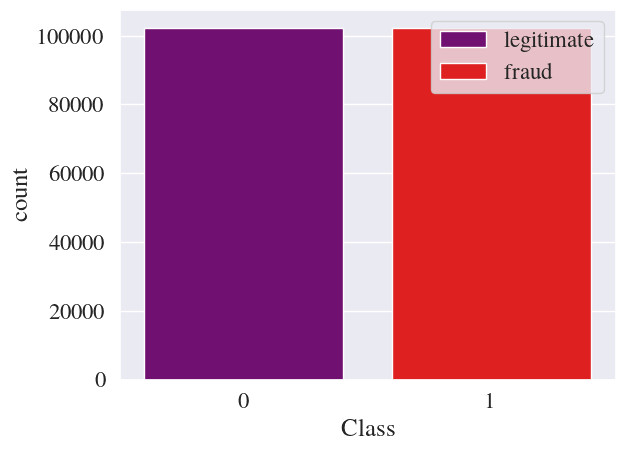

In [219]:
print('Distribution of the Classes in the subsample dataset')
print(upsampled11['Class'].value_counts()/len(upsampled11))

# My target variable is the class
yup11 = upsampled11.Class

# My features are everything else, so I take out the 'Class' column. 
Xup11 = upsampled11.drop('Class', axis = 1)

sns.countplot(x=yup11, data=Xup11,  palette=["purple", "red"], label=["legitimate", "fraud"])
plt.legend(['legitimate', 'fraud'])

save_plot('ClassesHistogram-UpSampled.pdf')
plt.show()

* Looking the correlation matrix:

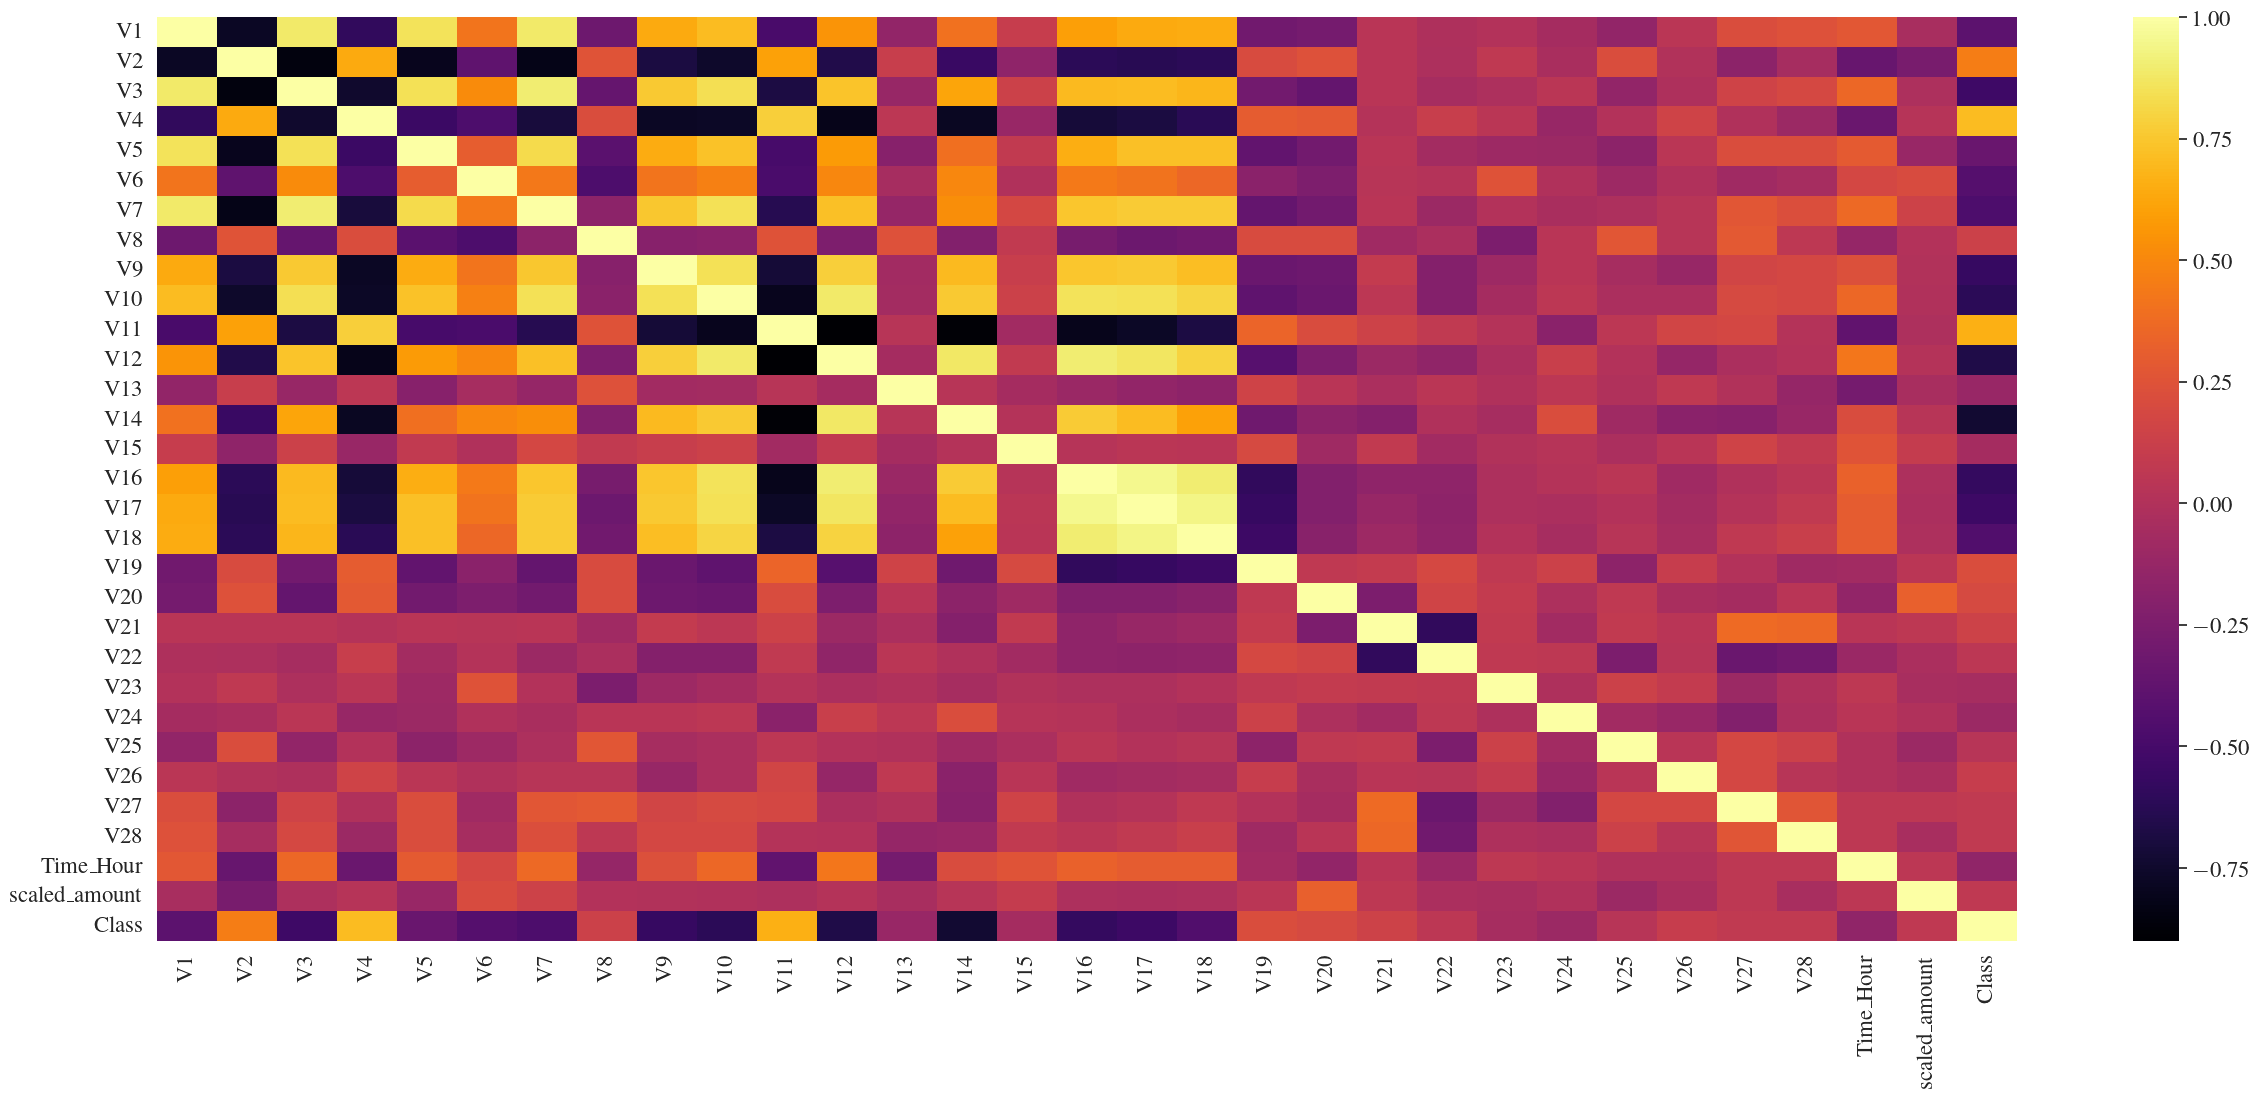

In [220]:
plt.figure(figsize = (30,12))
sns.heatmap(upsampled11.corr(), cmap = 'inferno', annot = False)
save_plot('OversampleCorrelationsEquallyDistributedSet.pdf')

* Before and after:

In [221]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [222]:
upsampled11.Class.value_counts()

0    102353
1    102353
Name: Class, dtype: int64

In [223]:
print('Legitime transactions corresponds to', round(upsampled11['Class'].value_counts()[0]/len(upsampled11)*100,3),'% of the data set.  While the frauds correspond to', round(upsampled11['Class'].value_counts()[1]/len(upsampled11)*100,3),'% of the data set')

Legitime transactions corresponds to 50.0 % of the data set.  While the frauds correspond to 50.0 % of the data set


Right. These two new datasets constructed upon the training set contain a better sample space to detect frauds!

Now the idea is to use the random forest on these data sets and then evaluate the metrics in when applying it to the test set.

In [224]:
# Separating the target and variables in the upsampled set
y_train_up11 = upsampled11.Class
X_train_up11 = upsampled11.drop('Class', axis = 1)

* Using the new sets to train the chosen models: RF and Logistic regression

In [225]:
# Training the logistic regression with the upsampled minority class
lr_up11 = LogisticRegression(solver='liblinear').fit(X_train_up11, y_train_up11)
# making predictions
lr_up11_predproba = lr_up11.predict_proba(X_test)

In [229]:
# Training the RF with the upsampled minority class
rf_up11 = RandomForestClassifier(n_estimators = 500, max_depth = 20, n_jobs=-1).fit(X_train_up11, y_train_up11)
# Making predictions
rf_up11_predproba = rf_up11.predict_proba(X_test)

* Analysing the dependence of the recall and f1 score with the thrshold

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


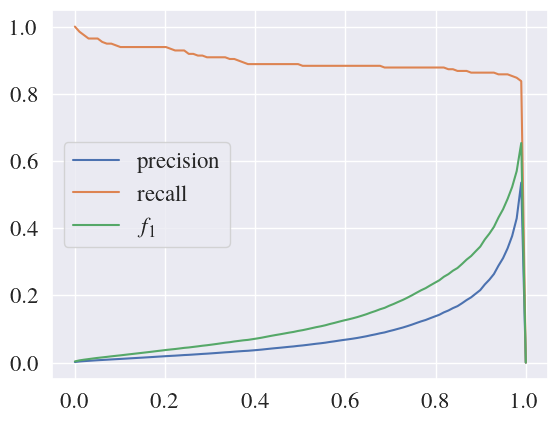

In [228]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    lista = lr_up11_predproba
    precision_thr = precision_score(y_test, (lista[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lista[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lista[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('LogisticRegression-Thrverification-Upsampled.pdf')
plt.show()

* Again in this case the Logistic regression is not good as it does not provide a good f1 or precision.
* I drop logistic regression as well.

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


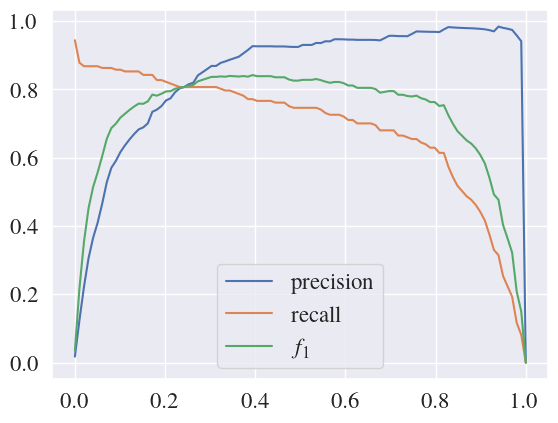

In [230]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    lista = rf_up11_predproba
    precision_thr = precision_score(y_test, (lista[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lista[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lista[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('RandomForest-Thrverification-Upsampled.pdf')
plt.show()

* From the plot above I choose 0.4 to be the thrshold as both f1 and recall perform similarly with this value;
* My predictions are:

* Comparing the metric performances:

In [243]:
metric_printer(rf_up11_predproba)

metric_printer(rf_up11_predproba, 0.55)


Precision: 0.93
Recall: 0.75
f1 score: 0.83
ROC-AUC: 0.97
Confunsion matrix:
        0    1
0  113715   11
1      50  147
Precision: 0.94
Recall: 0.73
f1 score: 0.82
ROC-AUC: 0.97
Confunsion matrix:
        0    1
0  113717    9
1      53  144


**Summary**
*  To deal with the unbalancing problem I used a resempling technique in the training dataset in which I constructed a perfectly balanced dataset, meaning that both classes have equal frequencies;
* Within this new dataset, I made predictions using the prediction_proba for the Logistic regression and random forest;
* I studied the dependence of the recall and f1 score with the threshold, this analysis led me to choose 0.4 as a thrshold based on the fact that both metrics perform equally with this value, i.e., there is no bias;
* Finally, I compared the predictions obtained with this threshold with the test set for both models.
* Comparing to the baseline, where I used brute data without tratment the metrics have shown a good improvement;
* Comparing the performance of the models within the upsampling technique we observe that the random forest performs better in all metrics, a fact that is easily visualized by the confusion metrix: the random forest shows a confusion matrix with less false positives/negatives and more true positives/negatives.
* The performance of the next sets is going to be compared with the upsampled random forest with thrshold 0.4.

## 4.2 Undersample majority class

* Now we will randomly get rid of same samples of the majority class.
* The problem with this approach is evident: **we are trashing potentially important data at random**. 
* For this reason I prefer the first approach.

In [244]:
legit_downsampled11 = resample(legit,
                            replace=False, # sample without replacement
                            n_samples=len(fraud),
                            random_state=42)

In [245]:
# Combine mojority and upsampled 11 minority
dwsampled11 = pd.concat([legit_downsampled11, fraud])

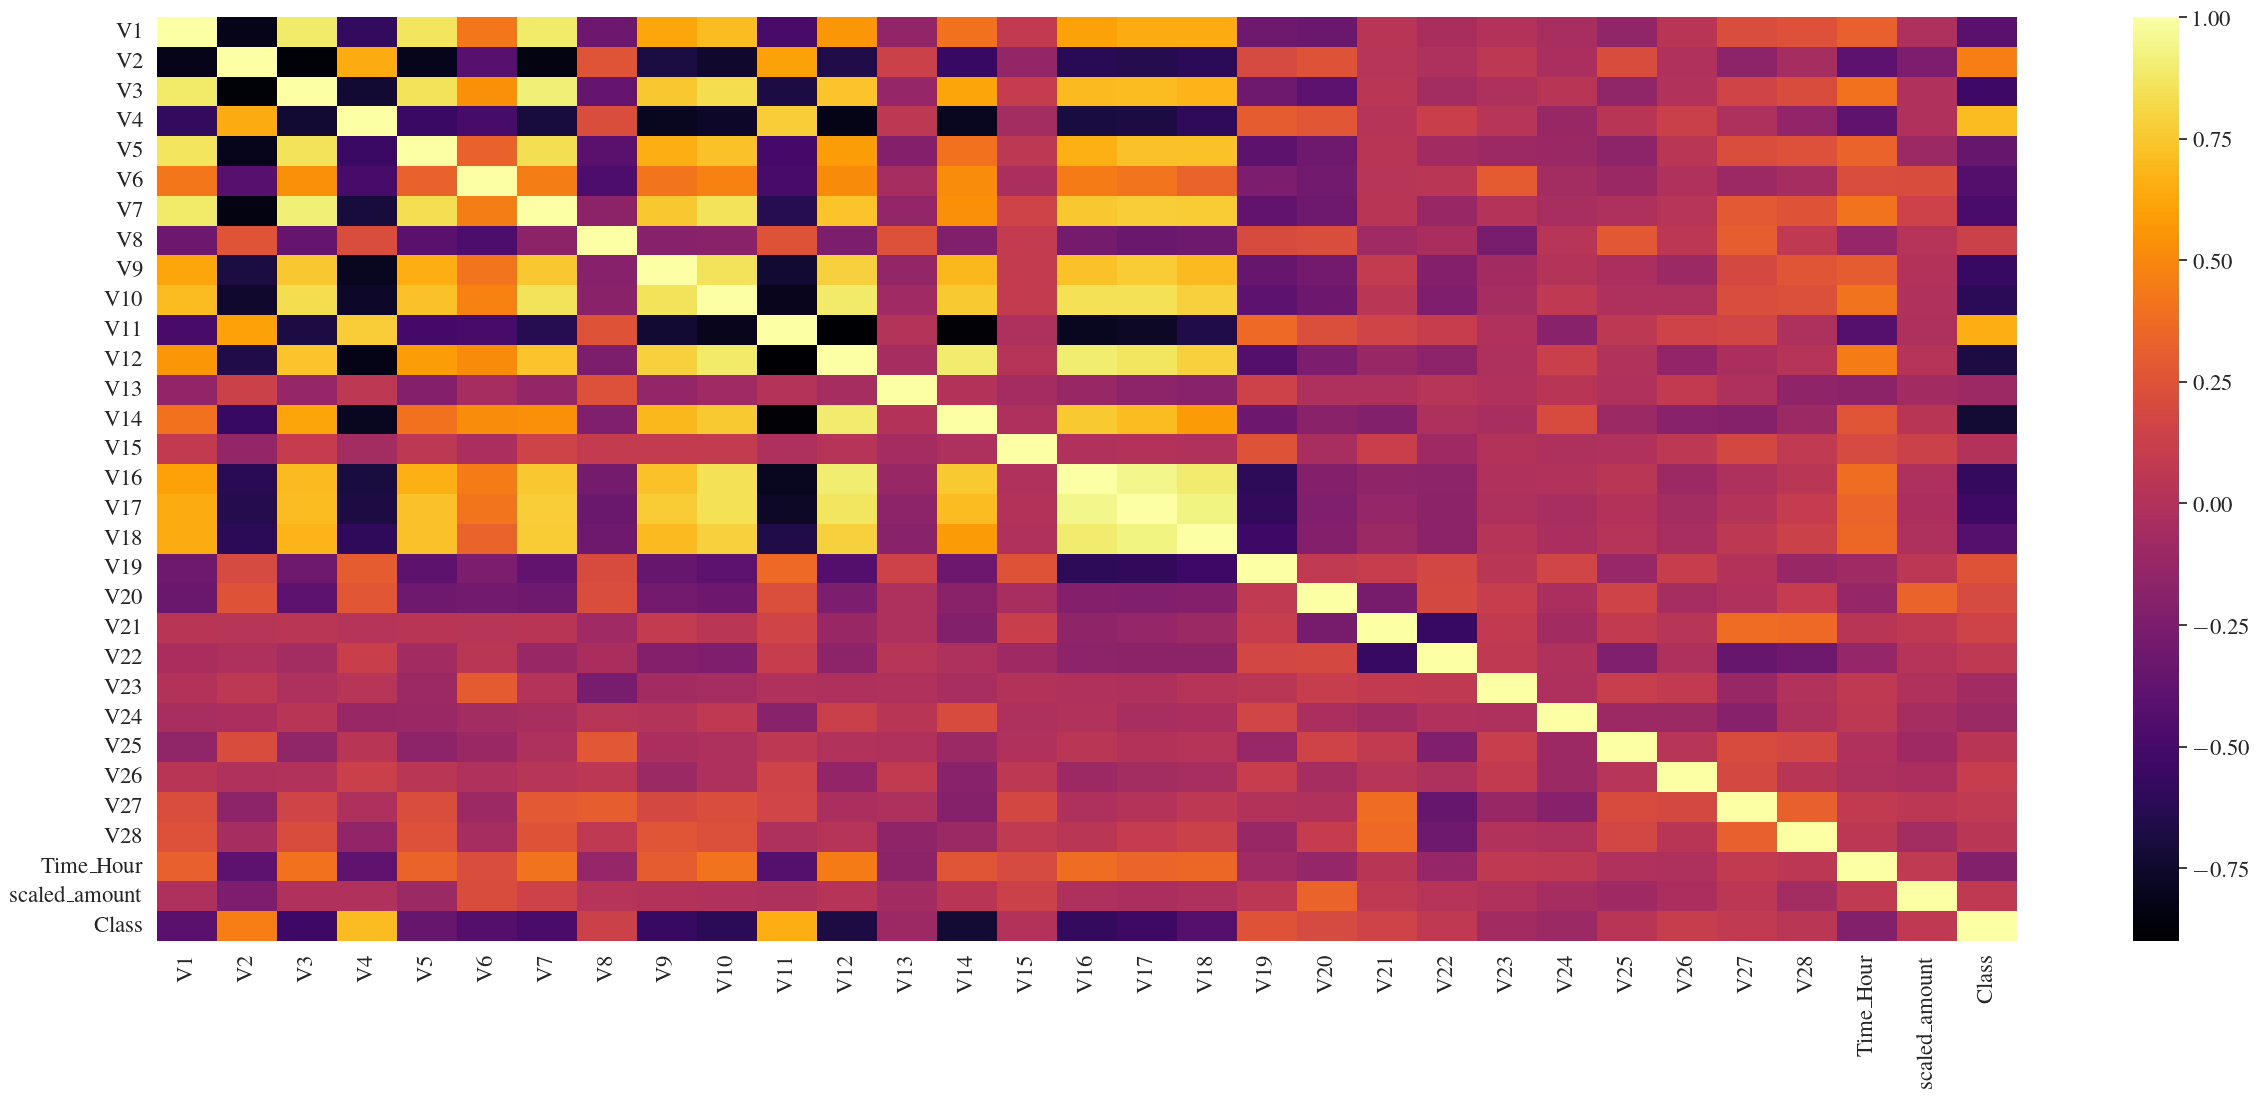

In [246]:
plt.figure(figsize = (30,12))
sns.heatmap(dwsampled11.corr(), cmap = 'inferno', annot = False)
save_plot('DownsampleCorrelationsEquallyDistributedSet.pdf')

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


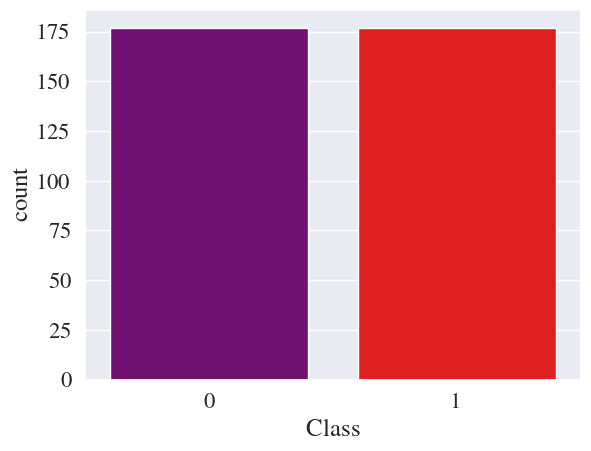

In [247]:
print('Distribution of the Classes in the subsample dataset')
print(dwsampled11['Class'].value_counts()/len(dwsampled11))

# My target variable is the class
y11 = dwsampled11.Class

# My features are everything else, so I take out the 'Class' column. 
X11 = dwsampled11.drop('Class', axis = 1)

sns.countplot(x=y11, data=X11,  palette=["purple", "red"], label=["legitimate", "fraud"])
save_plot('ClassesHistogram11DownSampledSet.pdf')
plt.show()

In [248]:
dwsampled11.Class.value_counts()

0    177
1    177
Name: Class, dtype: int64

In [250]:
# Defining the downsampled training sets
y_traindw11 = dwsampled11.Class
X_traindw11 = dwsampled11.drop('Class', axis = 1)

In [251]:
# Training the RF with the downsampled minority class
rfDownSampling11 = RandomForestClassifier(n_estimators = 500, max_depth = 20,  n_jobs=-1).fit(X_traindw11, y_traindw11)
# Making predictions
rf_dw11_predproba = rfDownSampling11.predict_proba(X_test)



In [252]:
# Training the logistic regression with the upsampled minority class
lrDownSampling11 = LogisticRegression(solver='liblinear').fit(X_traindw11, y_traindw11)
# making predictions
lr_dw11_predproba = lrDownSampling11.predict_proba(X_test)

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


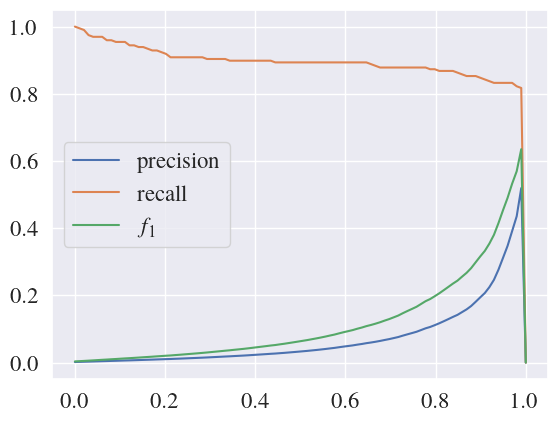

In [253]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    lista = lr_dw11_predproba
    precision_thr = precision_score(y_test, (lista[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lista[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lista[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('LogisticRegression-Thrverification-Downsampled.pdf')
plt.show()

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


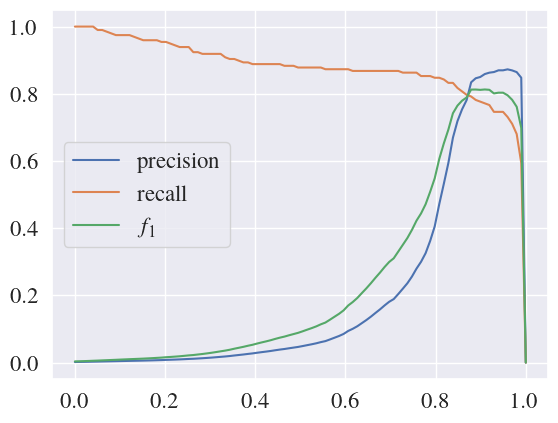

In [254]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    lista = rf_dw11_predproba
    precision_thr = precision_score(y_test, (lista[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lista[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lista[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('RandomForest-Thrverification-Downsampled.pdf')
plt.show()

These are weird curves. I'll take the thrshold to be 0.5 as standard.

In [256]:
metric_printer(rf_dw11_predproba)

Precision: 0.05
Recall: 0.88
f1 score: 0.09
ROC-AUC: 0.97
Confunsion matrix:
        0     1
0  110293  3433
1      24   173


In [257]:
metric_printer(rf_dw11_predproba, 0.55)

Precision: 0.06
Recall: 0.87
f1 score: 0.12
ROC-AUC: 0.97
Confunsion matrix:
        0     1
0  111148  2578
1      25   172


In [258]:
metric_printer(rf_dw11_predproba, 0.85)

Precision: 0.73
Recall: 0.82
f1 score: 0.77
ROC-AUC: 0.97
Confunsion matrix:
        0    1
0  113667   59
1      36  161


##  4.3 SMOTE

SMOTE creates a synthetic observations of the minority class. 

Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

I'll use the package: https://imbalanced-learn.org/stable/index.html

https://www.youtube.com/watch?v=U3X98xZ4_no&ab_channel=BhaveshBhatt

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [259]:
from imblearn.over_sampling import SMOTE

In [260]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, random_state=42)

# This will be the data were we are going to use to train the RF
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)

In [263]:
# Training the logistic regression with the upsampled minority class
lrSMOTE = LogisticRegression(solver='liblinear').fit(Xsm_train, ysm_train)
# making predictions
lr_SMOTE_predproba = lrSMOTE.predict_proba(X_test)

In [264]:
# Training the RF with the downsampled minority class
rfSMOTE = RandomForestClassifier(n_estimators = 200, max_depth = 20,  n_jobs=-1).fit(Xsm_train, ysm_train)
# Making predictions
rf_SMOTE_predproba = rfSMOTE.predict_proba(X_test)


/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


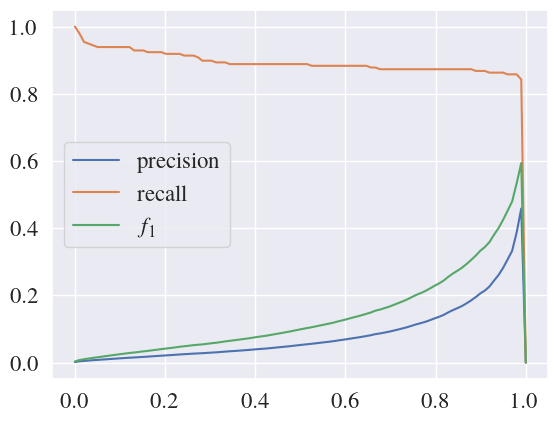

In [265]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    lista = lr_SMOTE_predproba
    precision_thr = precision_score(y_test, (lista[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lista[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lista[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('LogisticRegression-Thrverification-SMOTE.pdf')
plt.show()

/Users/brunogoes/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


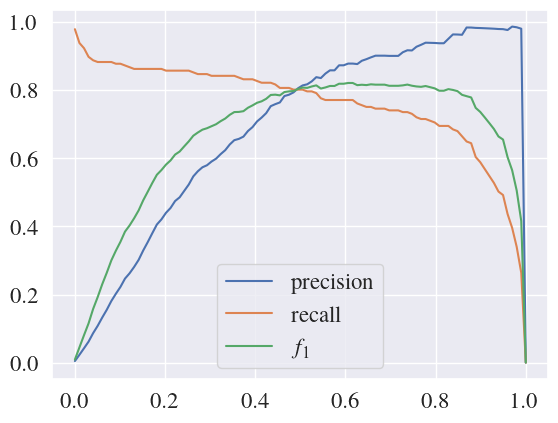

In [266]:
lista_thr = np.linspace(0,1,100)
lista_f1 =[]
lista_recall = []
lista_precision = []

for thr in lista_thr:
    lista = rf_SMOTE_predproba
    precision_thr = precision_score(y_test, (lista[:,1] > thr).astype(int))
    recall_thr = recall_score(y_test, (lista[:,1] > thr).astype(int))
    f1_thr = f1_score(y_test, (lista[:,1] > thr).astype(int))
    
    lista_precision.append(precision_thr)
    lista_f1.append(f1_thr)
    lista_recall.append(recall_thr)

plt.plot(lista_thr, lista_precision, label='precision')
plt.plot(lista_thr, lista_recall, label='recall')
plt.plot(lista_thr, lista_f1, label=r'$f_1$')
plt.legend()
save_plot('RandomForest-Thrverification-SMOTE.pdf')
plt.show()

In [269]:
metric_printer(rf_SMOTE_predproba)

Precision: 0.81
Recall: 0.8
f1 score: 0.8
ROC-AUC: 0.98
Confunsion matrix:
        0    1
0  113688   38
1      39  158


In [282]:
metric_printer(rf_SMOTE_predproba,0.85)

Precision: 0.96
Recall: 0.68
f1 score: 0.79
ROC-AUC: 0.98
Confunsion matrix:
        0    1
0  113721    5
1      64  133


In [272]:
metric_printer(rf_brutedata_predprob_bal)

Precision: 0.94
Recall: 0.71
f1 score: 0.81
ROC-AUC: 0.96
Confunsion matrix:
        0    1
0  113717    9
1      57  140


# Conclusion and perspectives



* The SMOTE provided an improvement of the metrics for both models;
* Although the ROC-AUC is above 0.9 with the smote using the logistic regression we can see by the confusion matrix that the random forest with SMOTE is providing better predictions.
* Within the studied models and resampling strategies used in this project, the one that performs the better is the random forest with SMOTE technique with a threshold of 0.5.
* Other models can be studied, for instance the KNN to compare the metrics;
* Another relevant study that can be performed is, using the random forest, we can check the variables that are the most relevant;
* In my study I did not make an analysis of the outliers in the features, such an analysis can probabily lead to better performances, the reason for this choice is that I wanted to study the performance of the models within minimal data treatment.
* As a conclusion, for a bank I propose the use of the model trained with a SMOTE created dataset. This model presents false positives, hence the credit card of the client will not be blocked without a reason leading to a satisfactory result for the client. With a recall of 0.79, it presents a good average beteween the precision and recall, i.e., it correctly identifies the true positives. From the credit provider and client perspectives it is important since it leads to a low loss of money for both sides.

1. ROCAUC sempre tem que ser no predictproba: NUNCA USE O PREDICT.
2. amount: é possivel construir uma métrica financeira? Quantificar erros com uma valor em "dinheiros". Qual métrica tem dimensao de grana. **Confusion matrix, precision-recall average?? https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/** 
3. Variavel tempo como ela ta pode cagar o modelo. Ela precisa ser normalizada, periodizada.$\checkmark$

In [ ]:
#13 means that I have 1/3 of the minority class compared to the majority
fraud_upsample13 = resample(fraud,
                         replace=True, # We allow replacement
                         n_samples = round(len(legit)/3),# Construct a perfectly balanced set, i.e. there will be a 50:50 proportion between the classes.
                         random_state=42)

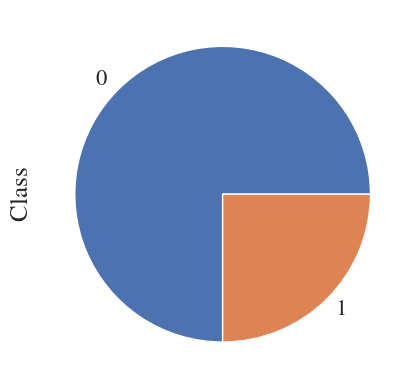

In [55]:
# Pie chart
(upsampled13['Class'].value_counts(normalize=True)*100).plot.pie()
save_plot('PiePlotUpsampled1to3.pdf')

In [124]:
legit_downsampled13 = resample(legit,
                            replace=False, # sample without replacement
                            
                            n_samples=round(len(fraud)/3),
                            random_state=42)

# Combine mojority and upsampled 11 minority
upsampled13 = pd.concat([legit, fraud_upsample13])

In [125]:
# Combine mojority and dwsampled 13 majority
dwsampled13 = pd.concat([legit_downsampled13, fraud])

<Axes: >

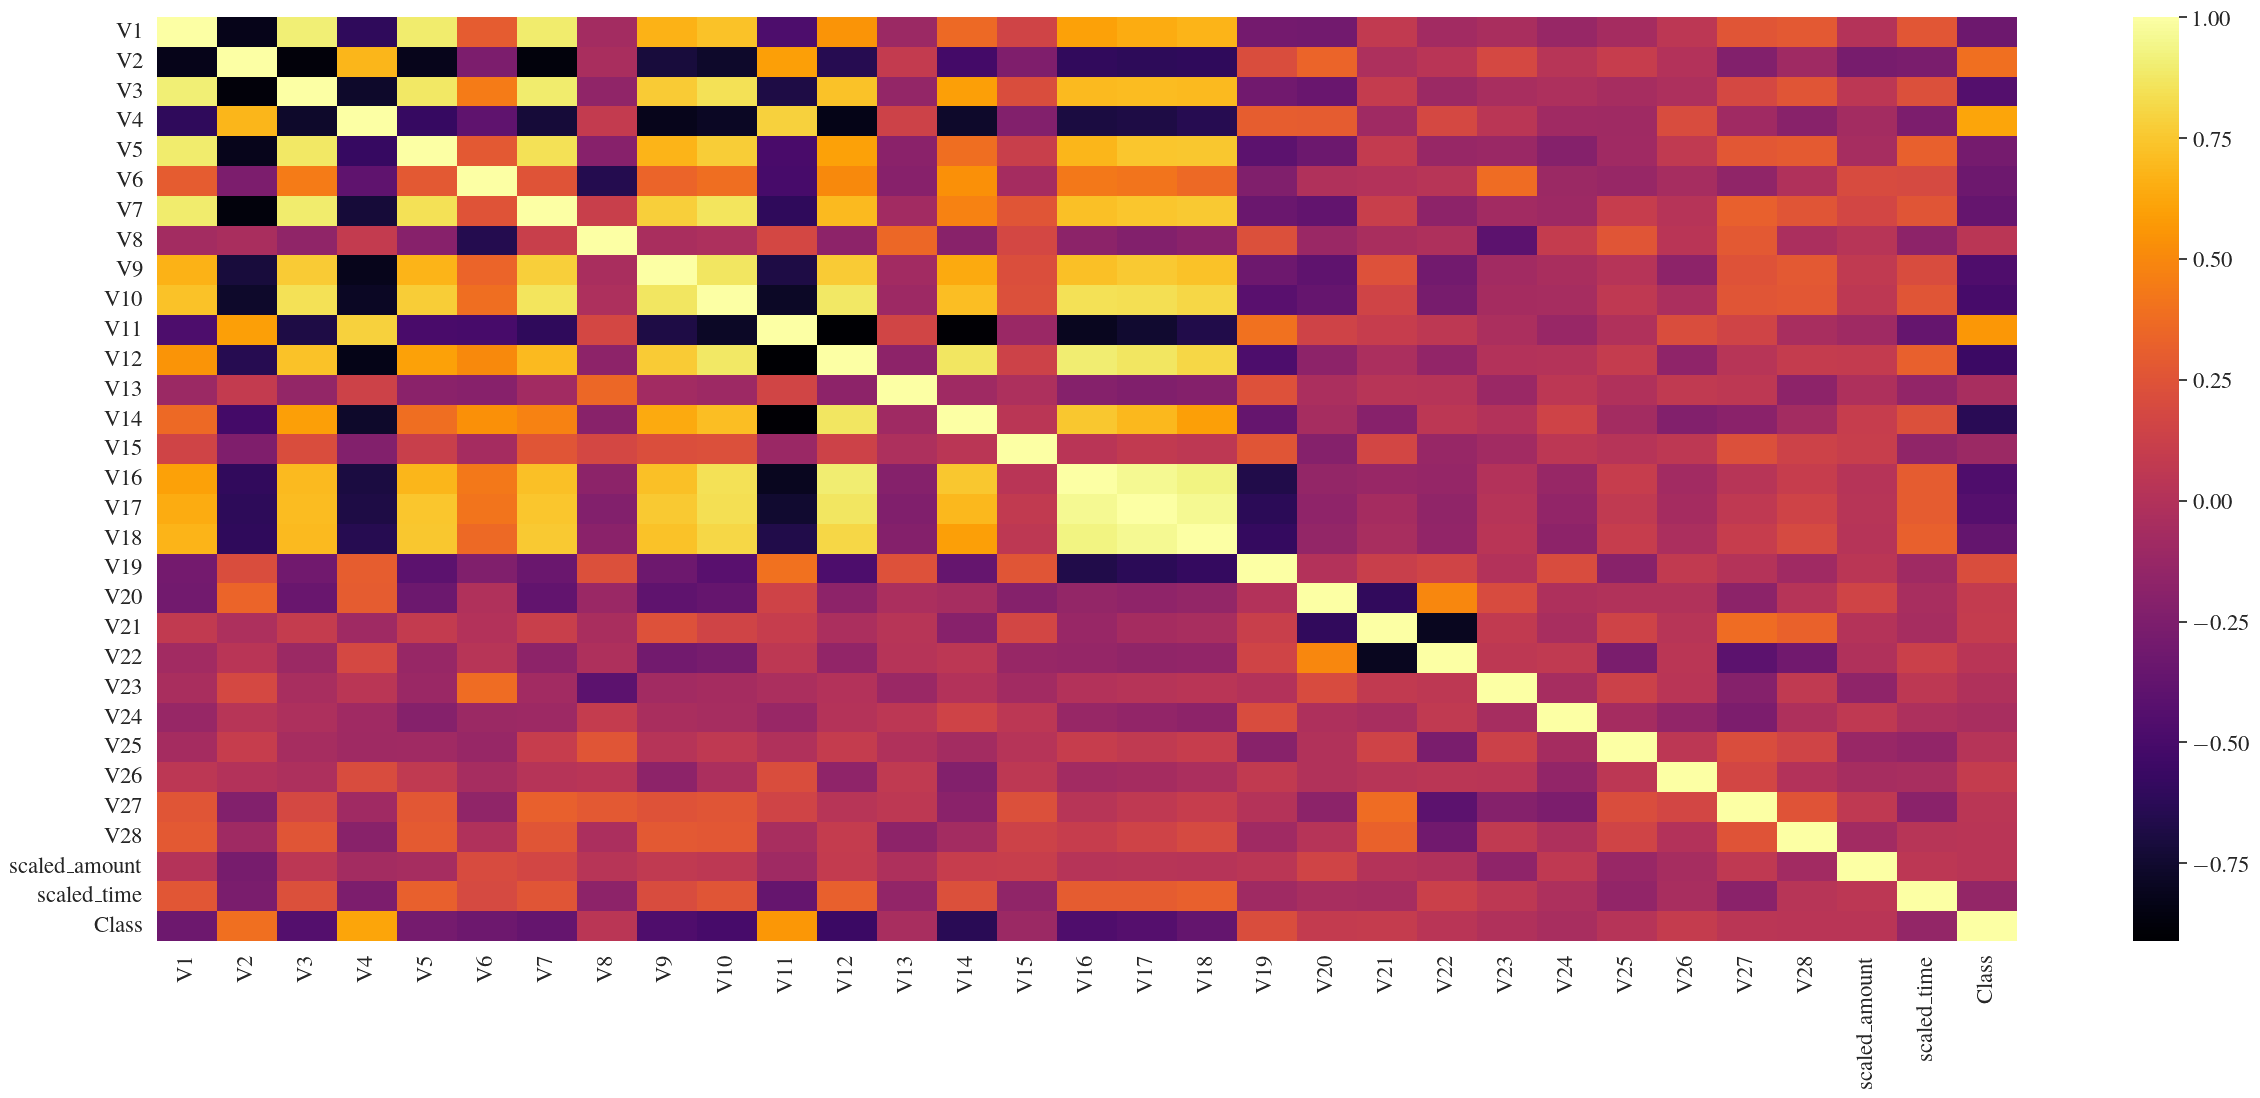

In [149]:
plt.figure(figsize = (30,12))
sns.heatmap(dwsampled13.corr(), cmap = 'inferno', annot = False)

Distribution of the Classes in the subsample dataset
1    0.75
0    0.25
Name: Class, dtype: float64


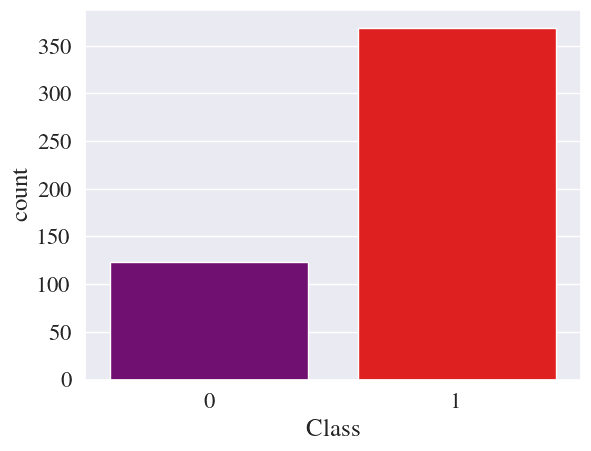

In [128]:
print('Distribution of the Classes in the subsample dataset')
print(dwsampled13['Class'].value_counts()/len(dwsampled13))

# My target variable is the class
y13 = dwsampled13.Class

# My features are everything else, so I take out the 'Class' column. 
X13 = dwsampled13.drop('Class', axis = 1)

sns.countplot(x=y13, data=X13,  palette=["purple", "red"], label=["legitimate", "fraud"])
save_plot('ClassesHistogram13DownSampledSet.pdf')
plt.show()

In [129]:
print('Legitime transactions corresponds to', round(dwsampled13['Class'].value_counts()[0]/len(dwsampled13)*100,3),'% of the data set.  While the frauds correspond to', round(dwsampled13['Class'].value_counts()[1]/len(dwsampled13)*100,3),'% of the data set')


Legitime transactions corresponds to 25.0 % of the data set.  While the frauds correspond to 75.0 % of the data set


* Here the frauds are much more frequent!

In [130]:
y_traindw13 = dwsampled13.Class
X_traindw13 = dwsampled13.drop('Class', axis = 1)

In [131]:
rfdw13 = RandomForestClassifier(n_estimators=200,  n_jobs=-1).fit(X_traindw13, y_traindw13)

# Making predictions
preddw13 = rfdw13.predict(X_test)


In [132]:
metric_printer(lr_prediction)

f1 score: 0.748971193415638
Recall: 0.7398373983739838
ROC-AUC: 0.8697147008189788
Log-Loss: 0.030879228908403722
Confunsion matrix:


,0,1
0,71050,29
1,32,91


In [133]:
metric_printer(preddw11)

f1 score: 0.11004543160020192
Recall: 0.8861788617886179
ROC-AUC: 0.9307862189751767
Log-Loss: 0.8924603371395965
Confunsion matrix:


,0,1
0,69330,1749
1,14,109


In [134]:
metric_printer(preddw13)

f1 score: 0.03430846990350743
Recall: 0.9105691056910569
ROC-AUC: 0.9110098725602122
Log-Loss: 3.19169734864728
Confunsion matrix:


,0,1
0,64785,6294
1,11,112


In [156]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.11.3 (main, Apr 19 2023, 18:51:09) [Clang 14.0.6 ]
executable: /Users/brunogoes/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
      sklearn: 1.2.2
          pip: 23.2
   setuptools: 67.8.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/brunogoes/anaconda3/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: Haswell

       filepath: /Users/brunogoes/anaconda3/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 16
None
